In [62]:
import os
import json
import numpy as np
from nuscenes.nuscenes import NuScenes
from tools.prediction_eval import PredictionEval, get_gt_agents

## TODOs

- filter and find scences with pedestrians
- render trajectories
- render prediction path

## Prediction annotation and results

python tools/prediction_eval.py --result_path 'work_dirs/vip3d_resnet50_3frame.1/results_nusc.json'

this command compares the results_nusc.json generated in eval session to the nuscenes_prediction_infos_val.json


nusc_eval = PredictionEval(result_path=args.result_path,
                               prediction_infos_path=args.prediction_infos_path)
                               
nusc_eval.main() -> self.evaluate()

In [9]:
fn_gt = "./nuscenes_prediction_infos_val.json"
fn_pred = "./work_dirs/vip3d_resnet50_3frame/results_nusc.json"
assert os.path.exists(fn_gt), 'Error: The result file does not exist!'
assert os.path.exists(fn_pred), 'Error'

In [10]:
type(fn_gt)

str

In [31]:
class_names = [
    'car', 'truck', 'bus', 'trailer',
    'motorcycle', 'bicycle', 'pedestrian',
]

In [11]:
nusc_eval = PredictionEval(result_path=fn_pred, output_dir="./work_dirs/eval/", prediction_infos_path=fn_gt)

In [12]:
len(nusc_eval.prediction_infos)

6019

In [14]:
nusc_eval.sample_token_2_pred_agents.keys(), len(nusc_eval.sample_token_2_pred_agents)

(dict_keys(['30e55a3ec6184d8cb1944b39ba19d622', 'cc18fde20db74d30825b0b60ec511b7b', '08e76760a8c64a92a86686baf68f6aff', '2140329a6990437aa46b83c30f49cf49', '01a7d01c014f406f87b8fe11976c3d0a', 'a2fada921a7d4141877f4a51328a21af', 'b06a815164ec466f9fdb525522bb3799', '5bd85334fdf94fb99c7eaa45d5feba0d', '61f89208546a4045af336659ebe8db05', '3bf56ebb22b741339967a95a9fbe2081', '296fcfbf2e29489699f1cb5631f38ff5', 'f7d75d25c86941f3aecfed9efea1a3e3', '1dfecb8189f54b999f4e47ddaa677fd0', '830ba619959e4802a955ac40c5ee9453', 'dc2b67cdadca4deb89d7d684f2894292', 'e1dffaba060040cfab07dec04790fbfa', 'be28204a6a5a42ed9939d95ec3f22f5f', '77c3d98fab3e4d3ea65747caaa74d605', '5224809ffef94a6e83454ad3930d3533', '3c18f85f037744b6ae4c8a6f8dc578c2', '08d95280dd2f42d98a4a6e33dff8e815', 'f38aedc5545643d5be815165c6574186', '56f30b8972084492bbe742d423fc00ff', 'd536032be01140afb6faa25b33de5487', '4094ae4656fb4b8fb1906192b24a34cb', 'df25b3ecaf994001ab5d5b92b9de89fd', '27f42a55215f4223a01afa79fcda72e6', 'f3c9f3e85f38438

### Analyse the first element
- sample_id: 30e55a3ec6184d8cb1944b39ba19d622

In [20]:
sample_id = list(nusc_eval.sample_token_2_pred_agents.keys())[0]
sample_id

'30e55a3ec6184d8cb1944b39ba19d622'

In [24]:
nusc_eval.sample_token_2_pred_agents[sample_id]

In [53]:
for pred_ag in nusc_eval.sample_token_2_pred_agents[sample_id]:
    # print(pred_ag.sample_token)
    print("translation: ", pred_ag.translation)
    print("future traj: ", len(pred_ag.pred_future_trajs), pred_ag.pred_future_trajs[1])
    break

translation:  [747.60927209 929.98433824]
future traj:  6 [[747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]
 [747.60927209 929.98433824]]


### gt infos

In [33]:
nusc_eval.prediction_infos[0].keys(), nusc_eval.prediction_infos[0]["sample_token"], nusc_eval.prediction_infos[0]["timestamp"]

(dict_keys(['sample_token', 'timestamp', 'instance_inds', 'gt_bboxes_3d', 'gt_labels_3d']),
 '30e55a3ec6184d8cb1944b39ba19d622',
 1531281439800013)

In [42]:
nusc_eval.prediction_infos[1].keys(), nusc_eval.prediction_infos[1]["sample_token"], nusc_eval.prediction_infos[1]["timestamp"]

(dict_keys(['sample_token', 'timestamp', 'instance_inds', 'gt_bboxes_3d', 'gt_labels_3d']),
 'cc18fde20db74d30825b0b60ec511b7b',
 1531281440299931)

In [32]:
print(nusc_eval.prediction_infos[0]["instance_inds"])
print([class_names[typ] for typ in nusc_eval.prediction_infos[0]["gt_labels_3d"]])

[17291, 17294, 17299, 17300, 17302, 17309, 17319, 17320]
['car', 'bicycle', 'bicycle', 'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian']


In [41]:
print(len(nusc_eval.prediction_infos[0]["gt_bboxes_3d"]))
print([len(bboxes) for bboxes in nusc_eval.prediction_infos[0]["gt_bboxes_3d"]])
print(nusc_eval.prediction_infos[0]["gt_bboxes_3d"][0])
print(nusc_eval.prediction_infos[0]["gt_bboxes_3d"][1])

8
[7, 7, 7, 7, 7, 7, 7, 7]
[746.7265754929073, 931.183360907862, 0.5872361615682082, 1.8380000591278076, 4.396999835968018, 1.559000015258789, -3.889549517623843]
[721.9102513894284, 940.5398785729375, 0.5560358931117937, 0.30799999833106995, 1.5789999961853027, 1.1349999904632568, -0.8543173124368645]


In [63]:
gt_agent = get_gt_agents(nusc_eval.prediction_infos, 2)

In [65]:
gt_agent

08e76760a8c64a92a86686baf68f6aff
Number of agents:  3 7


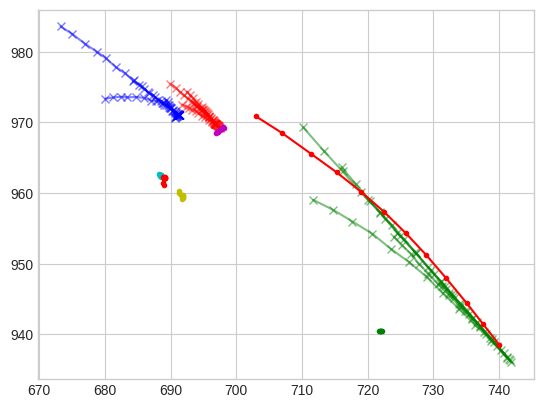

2140329a6990437aa46b83c30f49cf49
Number of agents:  7 9


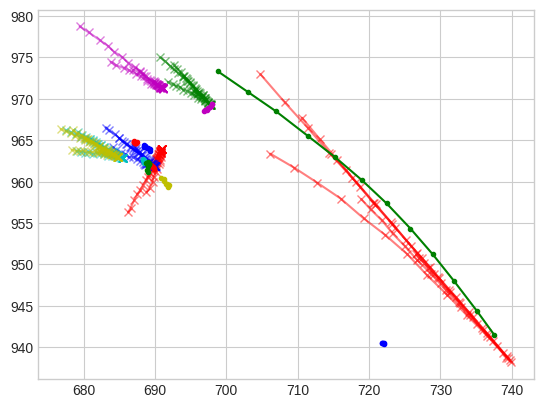

In [93]:
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b', 'c', 'm', 'y']

test_ids = [2, 3]

for test_id in test_ids:
    
    color_id = 0
    
    sample_id = list(nusc_eval.sample_token_2_pred_agents.keys())[test_id]
    print(sample_id)
    pred_agents = nusc_eval.sample_token_2_pred_agents[sample_id]
    
    gt_agents = get_gt_agents(nusc_eval.prediction_infos, test_id)

    print("Number of agents: ", len(pred_agents), len(gt_agents))
    
    color_id = 0
    for pred_ag in pred_agents:
        for i in range(6):
            plt.plot(pred_ag.pred_future_trajs[i][:, 0], pred_ag.pred_future_trajs[i][:, 1],color=colors[color_id], marker="x", alpha=0.5)
        color_id = (color_id + 1) % len(colors)
    
    color_id = 0
    for gt_ag in gt_agents:
        valid_indices = np.argwhere(gt_ag.future_traj_is_valid == 1) 
        plt.plot(gt_ag.future_traj[valid_indices, 0], gt_ag.future_traj[valid_indices, 1],color=colors[color_id], marker=".")
        color_id = (color_id + 1) % len(colors)
    
    plt.show()

class DetectionBoxes(EvalBoxes):
    def __init__(self,
                 sample_token: str = "",
                 translation: Tuple[float, float, float] = (0, 0, 0),
                 size: Tuple[float, float, float] = (0, 0, 0),
                 rotation: Tuple[float, float, float, float] = (0, 0, 0, 0),
                 velocity: Tuple[float, float] = (0, 0),
                 ego_translation: [float, float, float] = (0, 0, 0),  # Translation to ego vehicle in meters.
                 num_pts: int = -1,  # Nbr. LIDAR or RADAR inside the box. Only for gt boxes.
                 detection_name: str = 'car',  # The class name used in the detection challenge.
                 detection_score: float = -1.0,  # GT samples do not have a score.
                 attribute_name: str = ''):  # Box attribute. Each box can have at most 1 attribute.



In [87]:
from nuscenes.eval.common.data_classes import EvalBox, EvalBoxes
from nuscenes.eval.detection.data_classes import DetectionBox
from nuscenes.eval.detection.render import visualize_sample

2140329a6990437aa46b83c30f49cf49
77 84
Rendering sample token 2140329a6990437aa46b83c30f49cf49


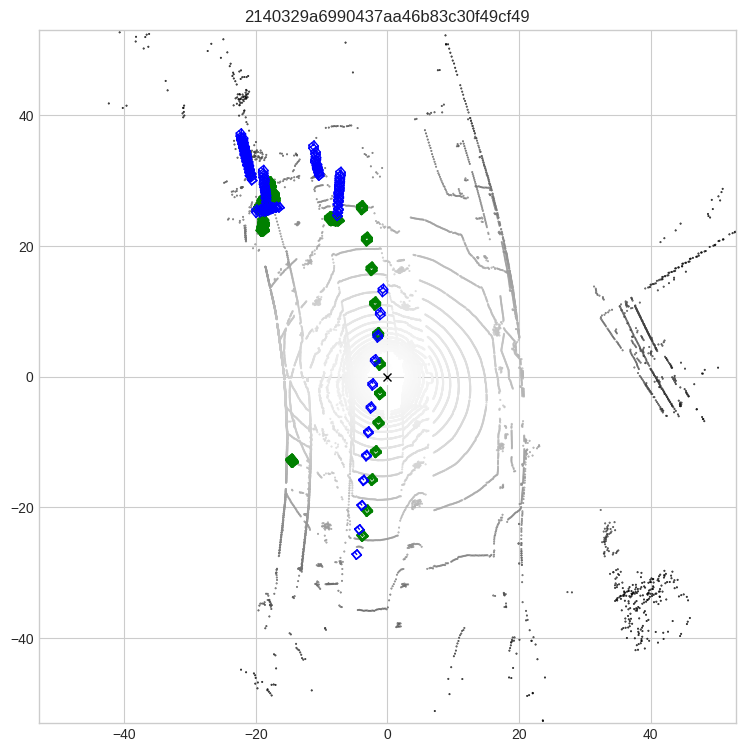

In [112]:
gt_eval_boxes = EvalBoxes()
pred_eval_boxes = EvalBoxes()

gt_boxes = []
for gt_agent in gt_agents:
    for i in range(len(gt_agent.future_traj)):
        if gt_agent.future_traj_is_valid[i] == 1:
            gt_boxes.append(DetectionBox(sample_token=sample_id,
                                                    translation=(gt_agent.future_traj[i][0], gt_agent.future_traj[i][1], 0.5),
                                                    rotation=(0, 0, 0, 1),
                                                    size=(1.0, 1.0, 1.0 + i)))
gt_eval_boxes.boxes[sample_id] = gt_boxes

pred_boxes = []
for pred_agent in pred_agents:
    for i in range(len(pred_agent.pred_future_trajs[0])):
        pred_boxes.append(DetectionBox(sample_token=sample_id,
                                                translation=(pred_agent.pred_future_trajs[0][i][0], pred_agent.pred_future_trajs[0][i][1], 0),
                                                rotation=(0, 0, 0, 1),
                                                size=(1.0, 1.0, 1.0 + i)))
pred_eval_boxes.boxes[sample_id] = pred_boxes
print(sample_id)
print(len(gt_boxes), len(pred_boxes))
visualize_sample(nusc, sample_id, gt_boxes=gt_eval_boxes, pred_boxes=pred_eval_boxes, conf_th=-2.0)

## Load Nuscenes and render the sample

In [22]:
nusc = NuScenes(version="v1.0-trainval", dataroot="data/nuscenes", verbose=True)

Loading NuScenes tables for version v1.0-trainval...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
34149 lidarseg,
Done loading in 23.621 seconds.
Reverse indexing ...
Done reverse indexing in 4.9 seconds.


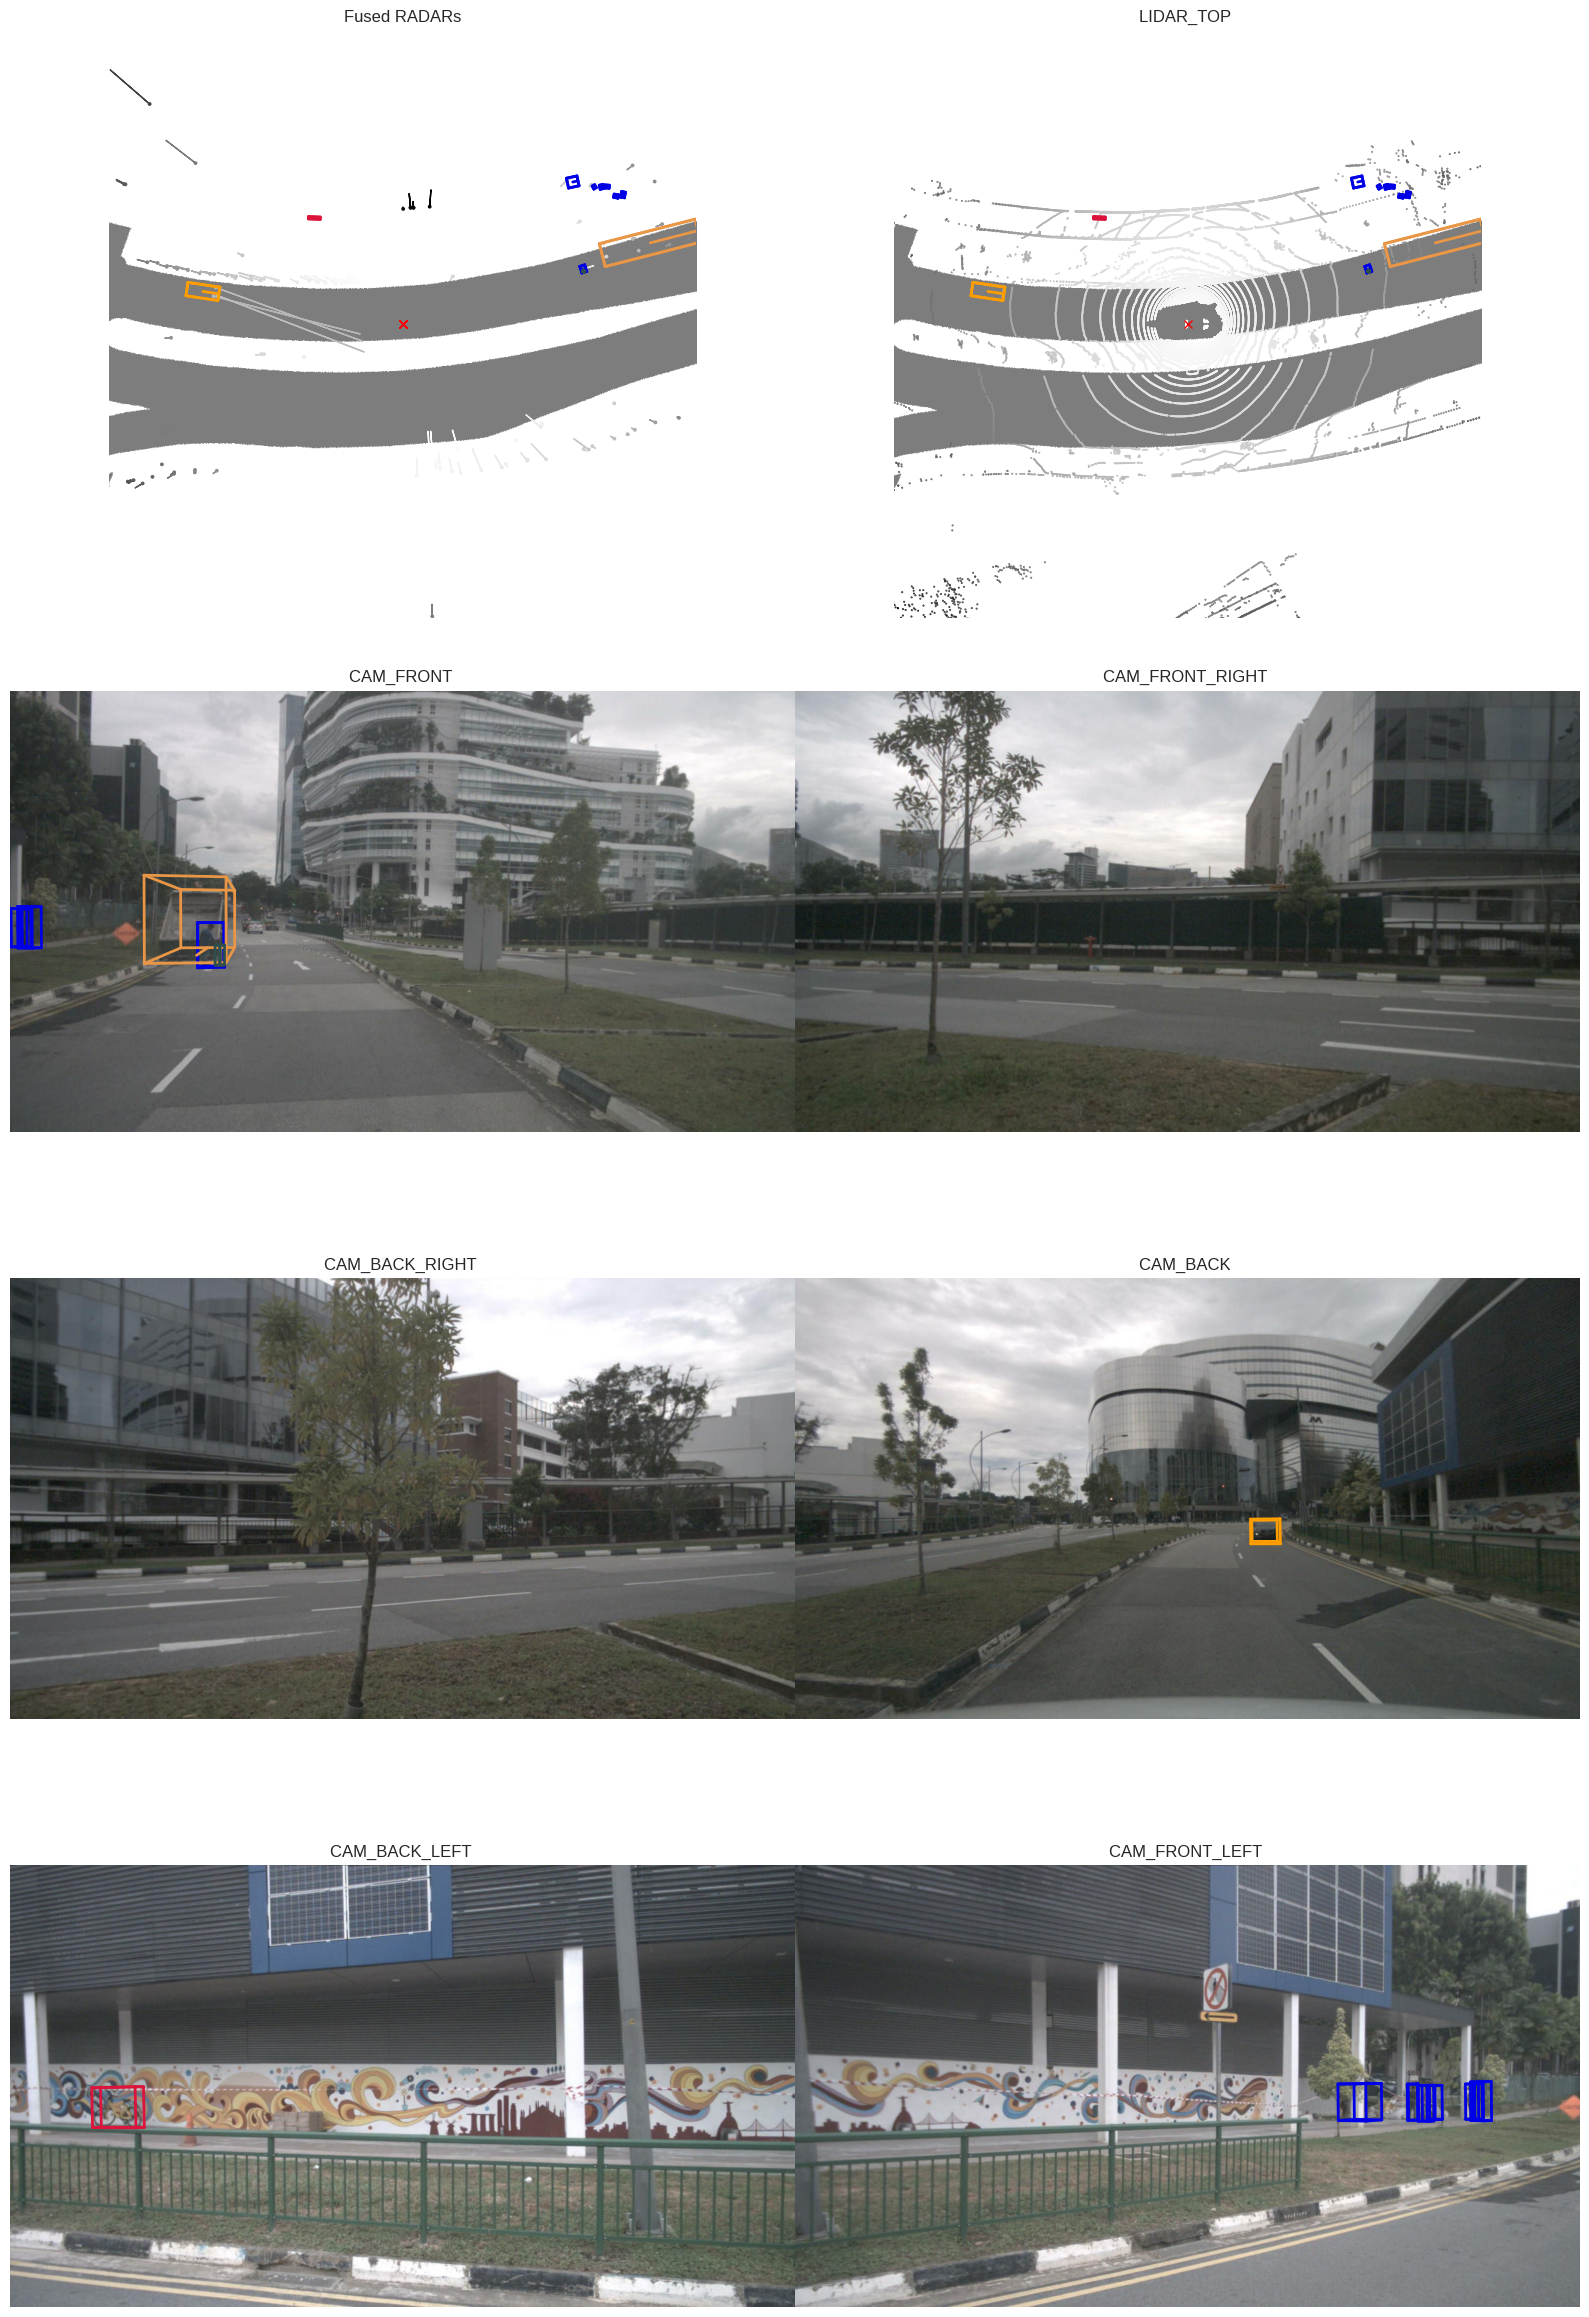

In [97]:
nusc.render_sample('2140329a6990437aa46b83c30f49cf49')

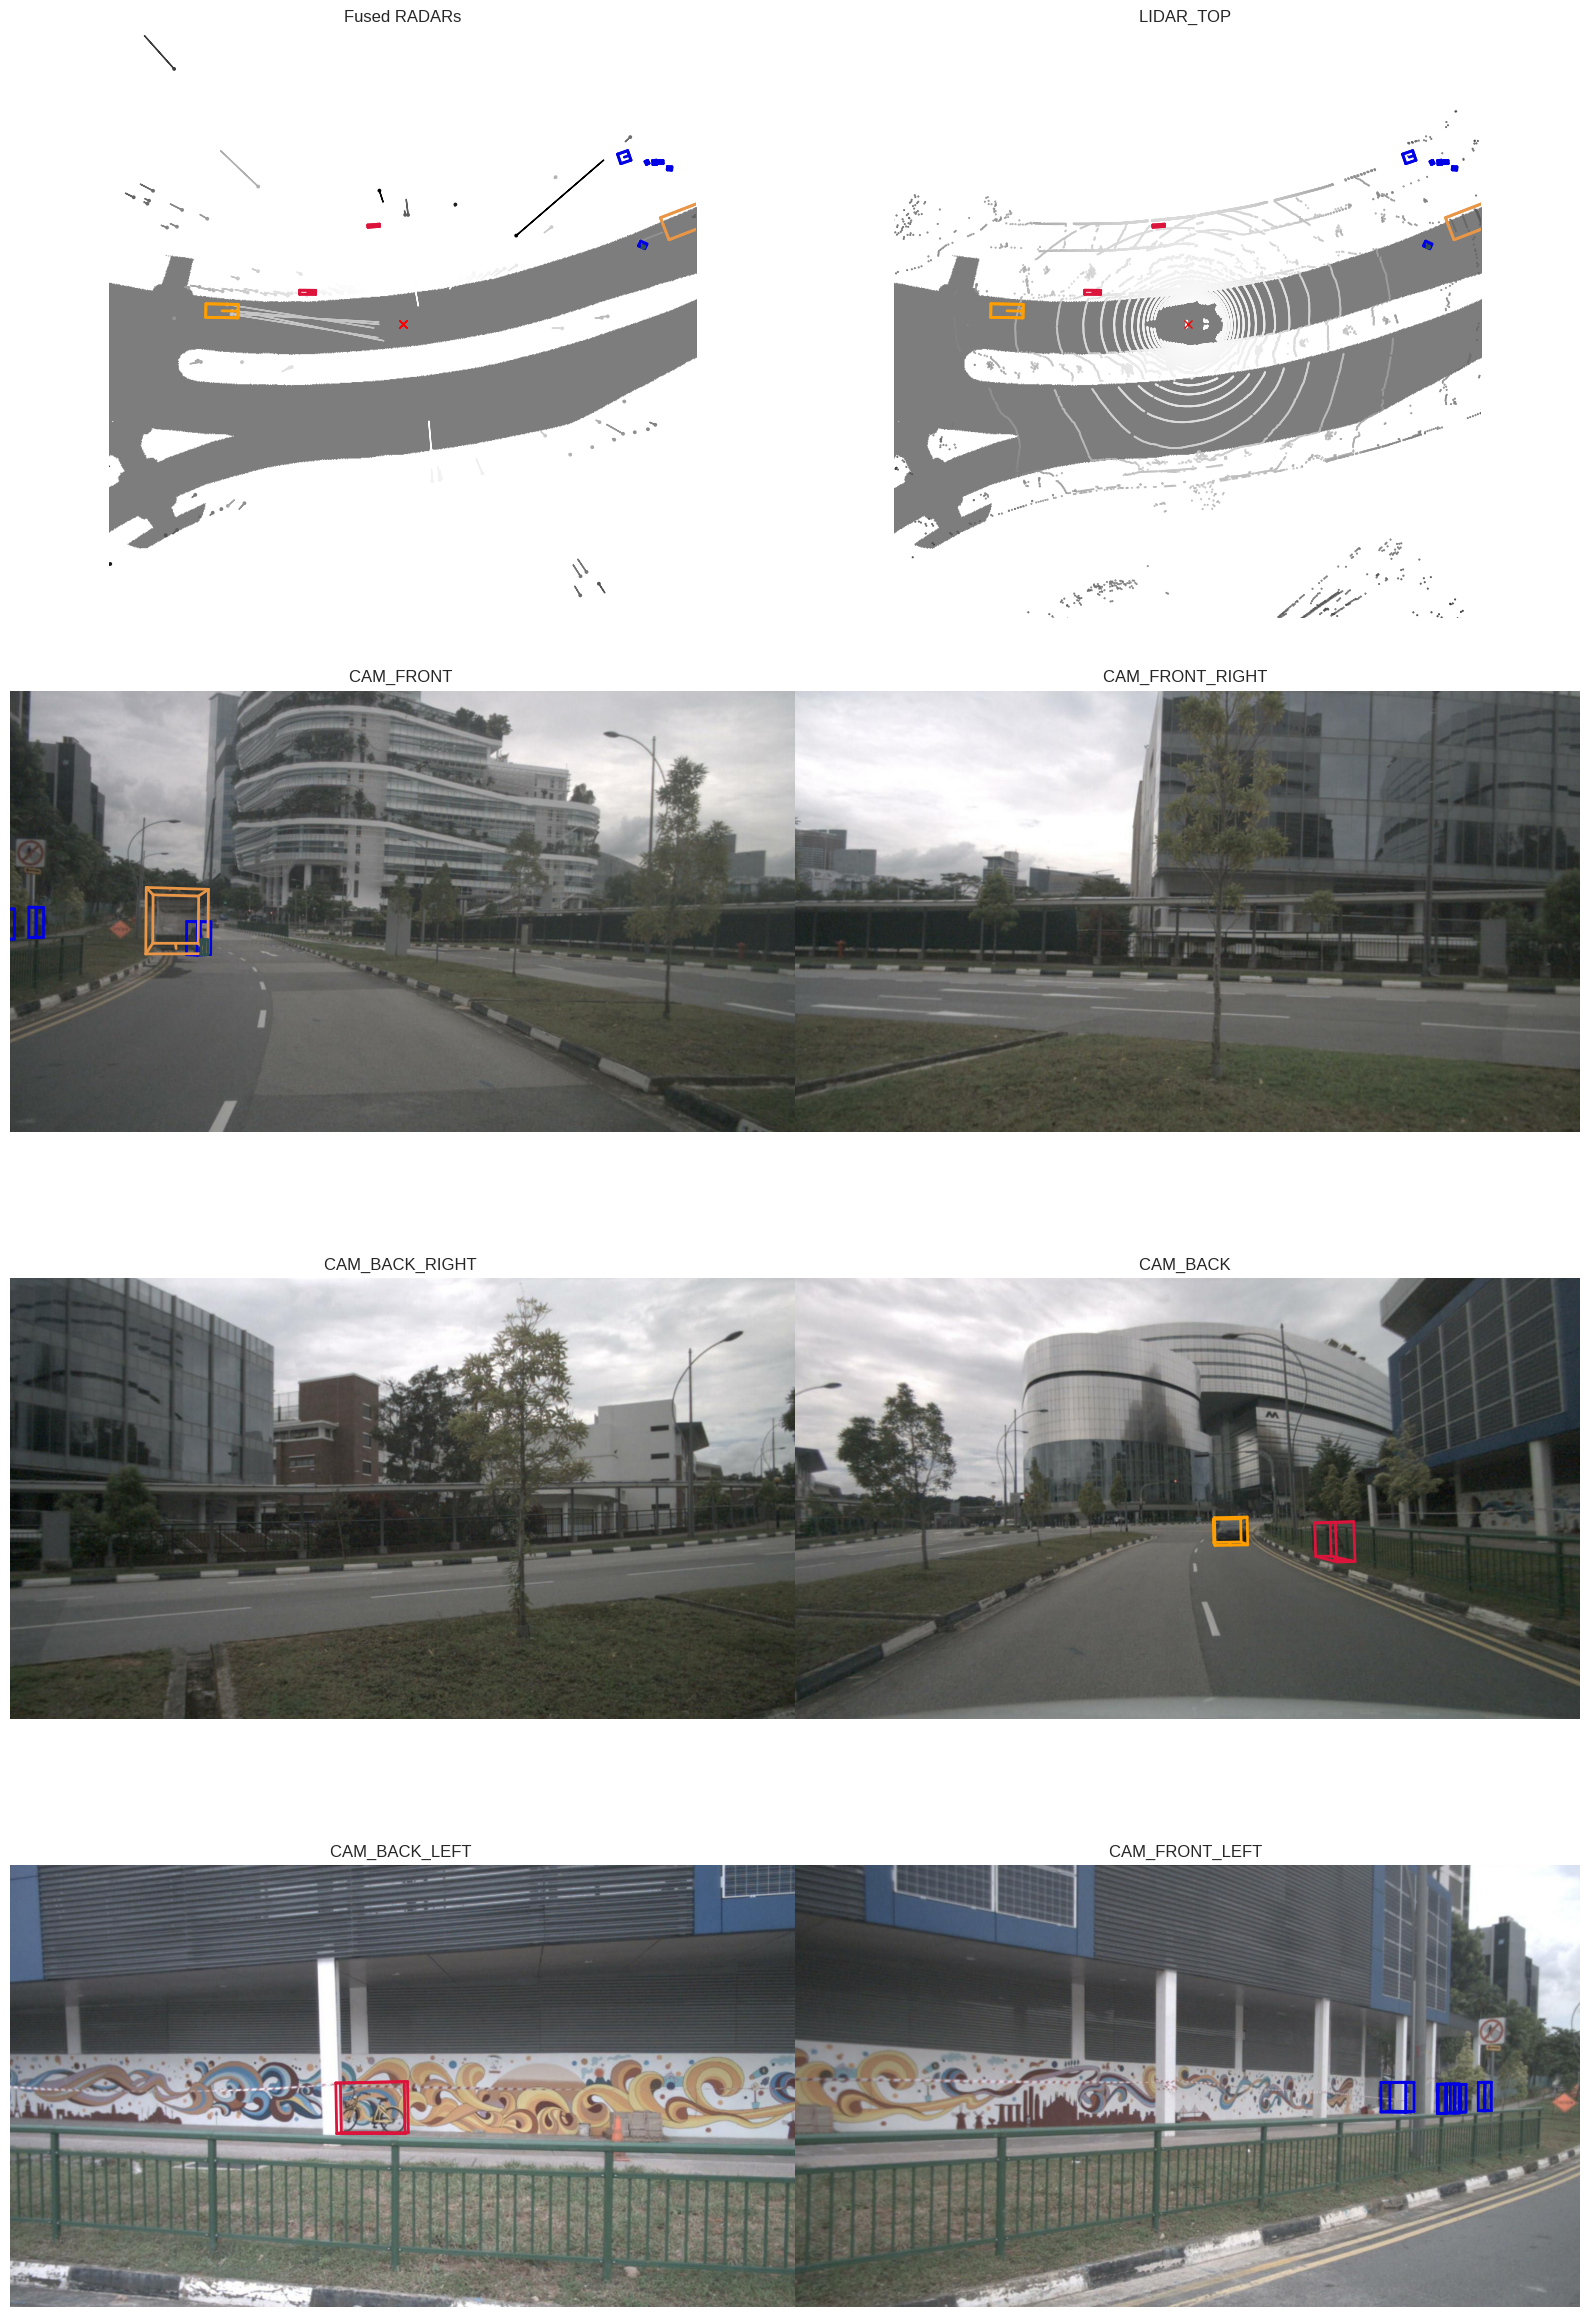

In [43]:
nusc.render_sample('cc18fde20db74d30825b0b60ec511b7b')

In [41]:
nusc.get("sample", '30e55a3ec6184d8cb1944b39ba19d622')

{'token': '30e55a3ec6184d8cb1944b39ba19d622',
 'timestamp': 1531281439800013,
 'prev': '',
 'next': 'cc18fde20db74d30825b0b60ec511b7b',
 'scene_token': 'c3ab8ee2c1a54068a72d7eb4cf22e43d',
 'data': {'RADAR_FRONT': '3f538f1d994c4b91821a274995df6b54',
  'RADAR_FRONT_LEFT': 'e5301eb70d684749959224bc76a13967',
  'RADAR_FRONT_RIGHT': '5364ed5a2f2c4916863e15ff7a0a0336',
  'RADAR_BACK_LEFT': 'cbd59e48cb14442ca888e591a4495e74',
  'RADAR_BACK_RIGHT': 'c975a3a418074436b2f13ed0a7ef592a',
  'LIDAR_TOP': 'a9f20e17155844bbb5e3781a8a0e206c',
  'CAM_FRONT': '1c771ca93bd14e5cb652d0fe44c882ea',
  'CAM_FRONT_RIGHT': 'c9fb560989ba4f11b67a388b34f4addc',
  'CAM_BACK_RIGHT': 'ec49e2305a804d81bebcfd2f5873b347',
  'CAM_BACK': '530fabc254fd46c298e27a2177880a97',
  'CAM_BACK_LEFT': 'b4c1bb0ef14a4b808420801853a58a36',
  'CAM_FRONT_LEFT': '0ae4ce1d75c5425486d049cd5d785245'},
 'anns': ['497447b8eded460f923ea7430bc9a4fc',
  '28ff090f95aa4338886c40a06820dcca',
  '42fd6a5f10974c1a862bda9e73a268ff',
  'd83664808c6944959

In [43]:
nusc.get("scene", "c3ab8ee2c1a54068a72d7eb4cf22e43d") 

{'token': 'c3ab8ee2c1a54068a72d7eb4cf22e43d',
 'log_token': 'a5bb7f9dd1884f1ea0de299caefe7ef4',
 'nbr_samples': 39,
 'first_sample_token': '30e55a3ec6184d8cb1944b39ba19d622',
 'last_sample_token': 'e59fefa1fc19406782779392dff95366',
 'name': 'scene-0268',
 'description': 'Construction zone, stopped at red light, parked cars'}

In [59]:
nusc.get("category", "1fa93b757fc74fb197cdd60001ad8abf")

{'token': '1fa93b757fc74fb197cdd60001ad8abf',
 'name': 'human.pedestrian.adult',
 'description': 'Adult subcategory.',
 'index': 2}

In [58]:
nusc.category[2]

{'token': '1fa93b757fc74fb197cdd60001ad8abf',
 'name': 'human.pedestrian.adult',
 'description': 'Adult subcategory.',
 'index': 2}

## pkl files 

In [1]:
import pickle
with open("data/nuscenes/nuscenes_tracking_infos_val.pkl", "rb") as fn:
    val_pkl = pickle.load(fn)

In [12]:
val_pkl.keys(), val_pkl["metadata"]

(dict_keys(['infos', 'metadata']), {'version': 'v1.0-trainval'})

In [22]:
val_pkl["infos"][0].keys()

dict_keys(['lidar_path', 'token', 'sweeps', 'cams', 'radars', 'lidar2ego_translation', 'lidar2ego_rotation', 'ego2global_translation', 'ego2global_rotation', 'timestamp', 'gt_boxes', 'gt_names', 'gt_velocity', 'num_lidar_pts', 'num_radar_pts', 'valid_flag', 'instance_inds'])

In [23]:
val_pkl["infos"][0]["token"]

'fd8420396768425eabec9bdddf7e64b6'

In [25]:
val_pkl["infos"][0]["ego2global_translation"]

[249.89610931430778, 917.5522573162784, 0.0]

In [19]:
with open("data/nuscenes/nuscenes_infos_temporal_val.pkl", "rb") as fn:
    val_temp_pkl = pickle.load(fn)

In [20]:
val_temp_pkl["infos"][0].keys()

dict_keys(['lidar_path', 'token', 'prev', 'next', 'can_bus', 'frame_idx', 'sweeps', 'cams', 'scene_token', 'lidar2ego_translation', 'lidar2ego_rotation', 'ego2global_translation', 'ego2global_rotation', 'timestamp', 'gt_boxes', 'gt_names', 'gt_velocity', 'num_lidar_pts', 'num_radar_pts', 'valid_flag'])